In [1]:
# %pwd
%cd ..

/home/agitated_curran/workdir/image_segmentation


In [2]:
from tools.features import load_depth_estimator, compose_features
from tools.segmentation import segment
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
estimator = load_depth_estimator()

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [185]:
path = '../images/200.jpg'
features, t = compose_features(path, estimator, shape=(256, 256), weights=[1.5, 0.2, 1, 0.1])

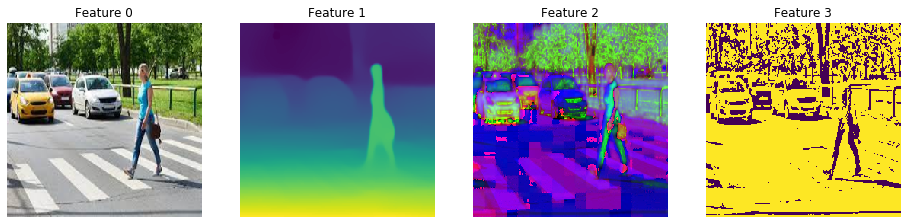

In [161]:
fig, axes = plt.subplots(1, len(t), figsize=(16, 4))

for i in range(len(t)) : 
    
    axes[i].imshow(t[i])
    axes[i].axis('off')
    axes[i].set_title(f'Feature {i}')
    
# plt.savefig('images/segmentation.png')

plt.show()

In [186]:
params = {'supper_pixel':2, 'embedding_method':'spectral', 'n_components':10, 'n_neighbors':20, 'cluster_method':'knn', 'n_clusters':10, 'pos_weight':1}
labels_shaped, embedding, labels = segment(features, params=params)

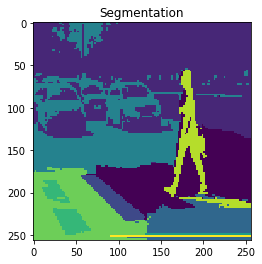

In [187]:
plt.imshow(labels_shaped)
plt.title("Segmentation")
plt.show()

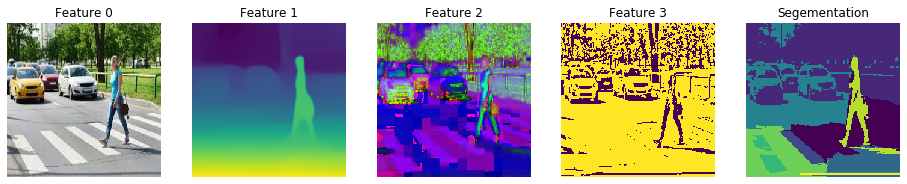

In [188]:
fig, axes = plt.subplots(1, len(t)+1, figsize=(16, 4))

for i in range(len(t)) : 
    
    axes[i].imshow(t[i])
    axes[i].axis('off')
    axes[i].set_title(f'Feature {i}')
    
axes[-1].imshow(labels_shaped)
axes[-1].axis('off')
axes[-1].set_title(f'Segementation')
plt.savefig('../images/segmentation4.png')
plt.show()

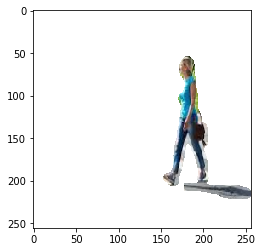

In [195]:
from scipy import signal

mask = (labels_shaped==8)
mask = signal.convolve2d(mask, np.ones((10, 10)), mode='same')
mask /= np.max(mask)

I = np.copy(t[0])
I[mask<0.2] = 255
plt.imshow(I)
plt.show()